## Vanessa Williams
## Week 7

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv('fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
quakes = pd.read_csv('earthquakes.csv')
covid = pd.read_csv('covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

### Problem 1

<Axes: title={'center': 'Rolling 20D Minimum Closing Price of Facebook Stock'}, xlabel='date'>

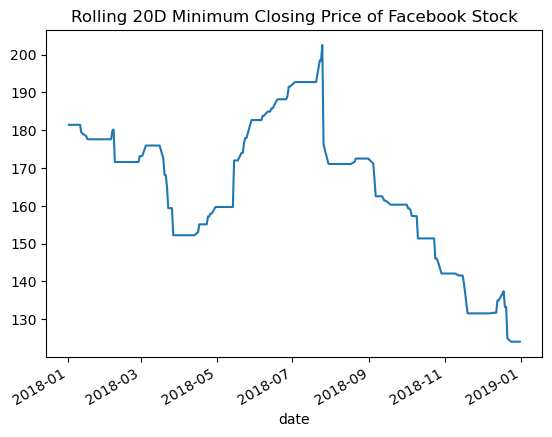

In [5]:
fb.close.rolling('20D').min().plot(
    title='Rolling 20D Minimum Closing Price of Facebook Stock'
)

### Problem 2 Create a histogram and KDE of the change from open to close in the price of Facebook stock.

<Axes: title={'center': "Facebook Stock Price's Daily Change from Open to Close"}, ylabel='Density'>

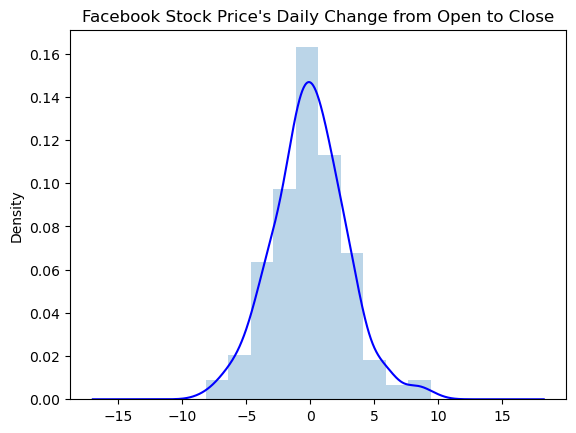

In [7]:
differential = fb.open - fb.close
ax = differential.plot(kind='hist', density=True, alpha=0.3)
differential.plot(
    kind='kde', color='blue', ax=ax, 
    title='Facebook Stock Price\'s Daily Change from Open to Close'
)

### Problem 3 Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

mb            Axes(0.1,0.15;0.173913x0.75)
ms_20    Axes(0.308696,0.15;0.173913x0.75)
mwr      Axes(0.517391,0.15;0.173913x0.75)
mww      Axes(0.726087,0.15;0.173913x0.75)
dtype: object

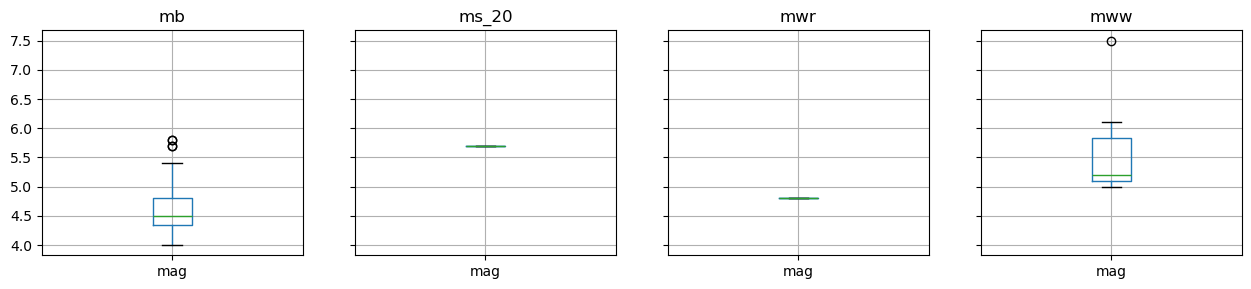

In [9]:
quakes.query('parsed_place == "Indonesia"')[['mag', 'magType']]\
    .groupby('magType').boxplot(layout=(1, 4), figsize=(15, 3))

### Problem 4 Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook.

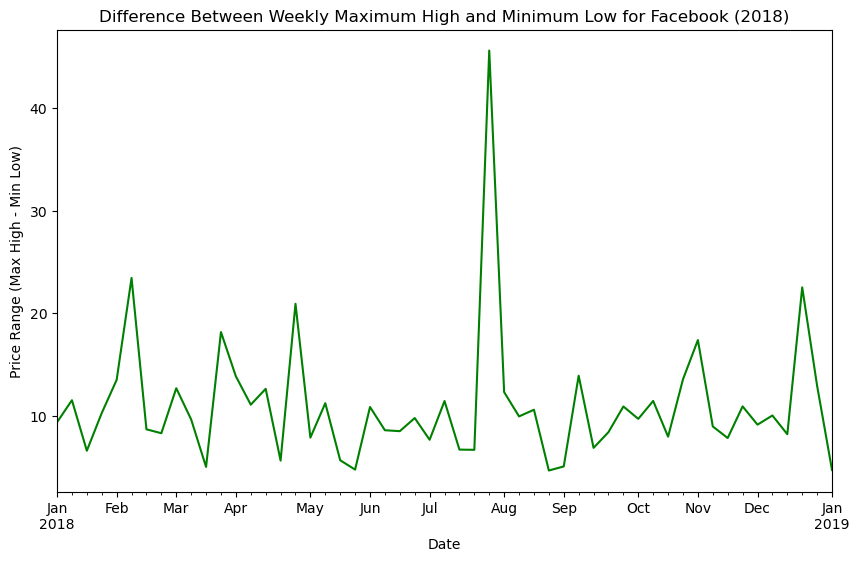

In [15]:
# Resample the data to weekly frequency and calculate the weekly maximum high and minimum low
weekly_max_high = fb['high'].resample('W').max()
weekly_min_low = fb['low'].resample('W').min()

# Calculate the difference between the weekly maximum high and minimum low
weekly_price_range = weekly_max_high - weekly_min_low

# Plot the weekly price range
weekly_price_range.plot(figsize=(10, 6), color='green')
plt.title('Difference Between Weekly Maximum High and Minimum Low for Facebook (2018)')
plt.ylabel('Price Range (Max High - Min Low)')
plt.xlabel('Date')
plt.show()

### Problem 6 Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

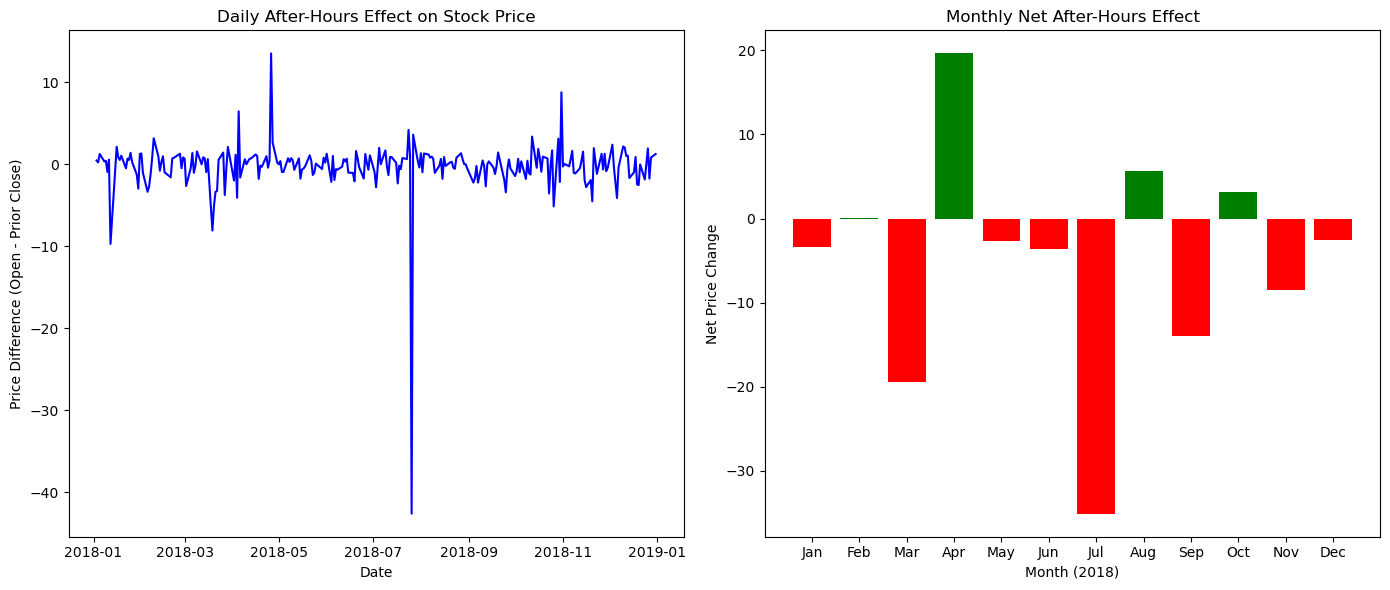

In [20]:
# Calculate the daily difference between the opening price and the prior day's closing price
fb['prior_close'] = fb['close'].shift(1)  # Prior day's closing price
fb['after_hours_diff'] = fb['open'] - fb['prior_close']  # After-hours difference

# Resample by month and calculate the net effect this had on a monthly basis
monthly_effect = fb['after_hours_diff'].resample('M').sum()

# Create the subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: Line plot of the daily after-hours difference
ax1.plot(fb.index, fb['after_hours_diff'], color='blue')
ax1.set_title("Daily After-Hours Effect on Stock Price")
ax1.set_ylabel("Price Difference (Open - Prior Close)")
ax1.set_xlabel("Date")

# Second subplot: Bar plot of the monthly net effect
colors = ['green' if val > 0 else 'red' for val in monthly_effect]
ax2.bar(monthly_effect.index.strftime('%b'), monthly_effect, color=colors)
ax2.set_title("Monthly Net After-Hours Effect")
ax2.set_ylabel("Net Price Change")
ax2.set_xlabel("Month (2018)")

plt.tight_layout()
plt.show()

#### Title: 6.2 Exercise
#### Author: Stefanie Molin
#### Date: 10/01/2024
#### Modified By: Vanessa Williams
#### Description: Problems 2 and 3